In [90]:
import time
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import binom

In [91]:
def Bin_tr_inv1(n,p):
    u=rd.random()
    prob=(1-p)**n   #pues p0=(1-p)^n
    F=prob          #La acumulada
    c= p/(1-p)      #Constante para la formula recursiva de pi
    i=0
    while u>=F:
        prob= prob*c*((n-i)/(1+i))      #p_i+1 = [(n-i)/(i+1)]*c*p_i
        F+=prob
        i+=1
    return i

In [92]:
def Bin_ensayos(n,p):
    u=np.random.uniform(size=n) #array con n variables uniformes generadas
    sum=0           #Cuento la cantidad de ensayos
    for j in range(n):
        if u[j]<p:
            sum+=1
    return sum



In [93]:
def sim_bin_tr_inv1(n,p,it):
    start_time = time.time()
    a=np.zeros(n)
    for j in range(it):
        u=Bin_tr_inv1(n,p)
        a[u-1]+=1
    end_time = time.time()
    return (a/it,end_time - start_time)

In [94]:
sim_bin_tr_inv1(10,0.3,10000)[1]

0.010607719421386719

In [95]:
#Version mejorada para algunos casos de p.
#Suponemos p>0.5
def sim_bin_tr_inv2(n,p,it):
    start_time = time.time()
    a=np.zeros(n)
    for j in range(it):
        u= n-Bin_tr_inv1(n,1-p) 
        a[u-1]+=1
    end_time = time.time()
    return (a/it,end_time - start_time)



In [96]:
def sim_bin_tr_inv3(n,p,it):
    start_time = time.time()
    a=np.zeros(n)
    for j in range(it):
        u=Bin_ensayos(n,p)
        a[u-1]+=1
    end_time = time.time()
    return (a/it,end_time - start_time)

In [97]:
#Para p>0.5 el metodo 2 un poco mas rapido:

#print(sim_bin_tr_inv2(15,0.6,10000)[1])
#print(sim_bin_tr_inv1(15,0.6,10000)[1])


Veamos si es parecida a la generacion de scipy

In [98]:
def sim_scipy_bin(n,p,it):
    a=np.zeros(n)
    for j in range(it):
        u=binom(n,p).rvs()
        a[u-1]+=1
    return a/it

In [101]:
def graph():
    n=10
    p=0.3
    it=10000
    
    y1= sim_bin_tr_inv1(n,p,it)[0] #simulacion propia
    y2=sim_scipy_bin(n,p,it) #simulacion de scipy
    
    x1= np.arange(0,n,1,dtype=int) #Im(X)   

    #Hago un grafico continuo
    x1_interp= np.linspace(x1.min(), x1.max(), 10000)

    f1= interp1d(x1, y1, kind='cubic')
    y1_interp= f1(x1_interp)
    
    f2= interp1d(x1, y2, kind='cubic')
    y2_interp=f2(x1_interp)

    fig,ax=plt.subplots()
    plt.plot(x1_interp,y1_interp,color="blue",label="propia")
    plt.plot(x1_interp,y2_interp,color="green",label="scipy")
    plt.scatter(x1,y1,color="black",label="Valores Discretos")
    ax.set_xlabel("Número generado")
    ax.set_ylabel("Probabilidad de ser generado")
    ax.set_title("Simulación v.a Binomial") 
    plt.legend()
    plt.show()

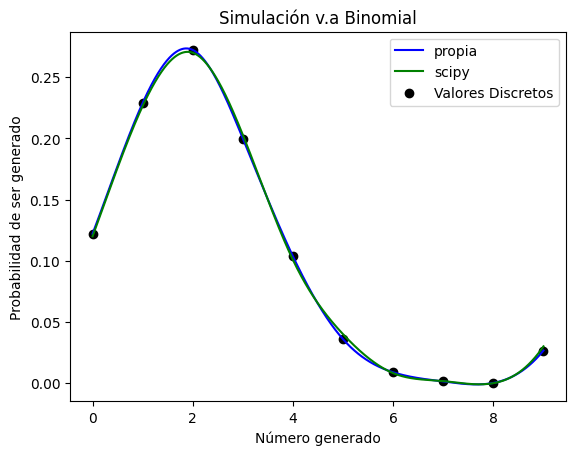

In [102]:
graph()